In [242]:
from shapely.geometry import Point, Polygon, LineString

#each stop has 4 - 6 coordinates

p970N = Point(-37.86703, 145.09159)
p970S = Point(-37.8676, 145.09146)
p970E = Point(-37.86735, 145.09195)
p970W = Point(-37.86723, 145.09103)
poly = Polygon([[p.x, p.y] for p in [p970N, p970E, p970S, p970W]])

In [134]:
# the distance and area between them is very small 
# so we can ignore them 
# other wise if its a big area we can take centroid of each point

point_dist1 = p970N.distance(p970S)
point_dist2 = p970E.distance(p970W)

print(poly.centroid)
print(poly.area)
print(point_dist1)
print(point_dist2)

POINT (-37.86730494814815 145.0915001580247)
2.7000000000296923e-07
0.0005846366392894821
0.0009277930803875255


In [135]:
# start building map

import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [195]:
# put coordinates in a DataFrame class
df = pd.DataFrame(
    {'Point': ['970', '2000', '2200', '2820', '2825', '2827', '2846', 
              '3001', '3002', '3120', '3122', '3126', '3127', '3180', 
              '3662', '3682', '3685', '3804', '3812', '4030', '4032', 
               '4034', '4035', '4040', '4043', '4051', '4057', '4063', 
              '4262', '4263', '4264', '4266', '4270', '4272', '4273', 
              '4321', '4324', '4335', '4812', '4821'],
     'Latitude': [-37.86703, -37.8516827, -37.8164799, -37.79477, -37.78661, -37.78093, -37.8612671, 
                 -37.81441, -37.81489, -37.82264, -37.82379, -37.82778, -37.82506, -37.79611, 
                 -37.80876, -37.83695, -37.85467, -37.83331, -37.83738, -37.79561, -37.80202, 
                 -37.81147, -37.8172654, -37.83256, -37.84683, -37.79419, -37.80431, -37.81404, 
                 -37.82155, -37.8228462, -37.82416, -37.82529, -37.82951, -37.83186, -37.84632, 
                 -37.800776, -37.809274, -37.80624, -37.82859, -37.81285],
     'Longitude': [145.09159, 145.0943457, 145.0977388, 145.03077, 145.06202, 145.07733, 145.058038, 
                  145.02243, 145.02663, 145.05734, 145.06466, 145.09885, 145.078, 145.08372, 
                   145.02757, 145.09699, 145.09384, 145.06247, 145.06119, 145.06251, 145.06127, 
                  145.05946, 145.0583603, 145.05545, 145.05275, 145.0696, 145.08197, 145.0801, 
                  145.01503, 145.0251292, 145.03445, 145.04387, 145.03304, 145.04668, 145.04378, 
                  145.0494611, 145.037306, 145.03518, 145.01644, 145.00849]
    })

In [204]:
# convert data frame into GeoDataFrame
# http://oksovi.geog.okstate.edu/_downloads/91156eb3f0f4b16f07e08bf65dc10ca6/Part%203-%20Geopandas.html
# https://automating-gis-processes.github.io/CSC18/lessons/L2/projections.html

# gdf = geopandas.GeoDataFrame(
#     df, geometry=geopandas.points_from_xy(df.Latitude, df.Longitude))

gdf = geopandas.GeoDataFrame(
     df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

In [205]:
print(gdf.head())
print(gdf.tail())
# confirm type to be GeoDataFrame
type(gdf)

  Point   Latitude   Longitude                         geometry
0   970 -37.867030  145.091590      POINT (145.09159 -37.86703)
1  2000 -37.851683  145.094346  POINT (145.0943457 -37.8516827)
2  2200 -37.816480  145.097739  POINT (145.0977388 -37.8164799)
3  2820 -37.794770  145.030770      POINT (145.03077 -37.79477)
4  2825 -37.786610  145.062020      POINT (145.06202 -37.78661)
   Point   Latitude   Longitude                        geometry
35  4321 -37.800776  145.049461  POINT (145.0494611 -37.800776)
36  4324 -37.809274  145.037306   POINT (145.037306 -37.809274)
37  4335 -37.806240  145.035180     POINT (145.03518 -37.80624)
38  4812 -37.828590  145.016440     POINT (145.01644 -37.82859)
39  4821 -37.812850  145.008490     POINT (145.00849 -37.81285)


geopandas.geodataframe.GeoDataFrame

In [206]:
# crs is Coordinate reference systems.
# None means Latitude and Longitude are just numbers and dont..
# ..represent anything
print(gdf.crs)

None


In [207]:
# convert to crs
# 'epsg' stands for European Petroleum Survey Group which belongs to WGS84 coordinate system 

from fiona.crs import from_epsg
gdf.crs = from_epsg(4326)
gdf.crs

{'init': 'epsg:4326', 'no_defs': True}

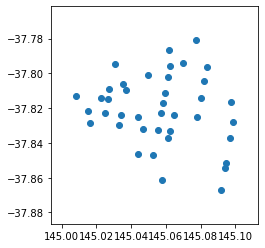

In [208]:
map = gdf.plot(label=Point)

# for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf.Point):
#     ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")


<class 'geopandas.geodataframe.GeoDataFrame'>
{'init': 'epsg:3857', 'no_defs': True}


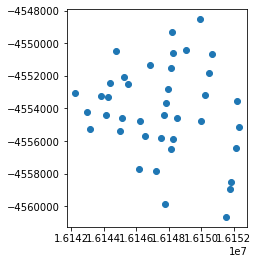

In [226]:
# this should add background map to our coordinates (import from on street maps)

# http://geopandas.org/gallery/plotting_basemap_background.html

import contextily as ctx

# def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
#     xmin, xmax, ymin, ymax = ax.axis()
#     basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
#     ax.imshow(basemap, extent=extent, interpolation='bilinear')
#     # restore original x/y limits
#     ax.axis((xmin, xmax, ymin, ymax))
    
    
    
gdf2 = gdf.copy()
gdf2 = gdf2.to_crs(epsg=3857)
gdf2.plot()
print(type(gdf2))
print(gdf2.crs)

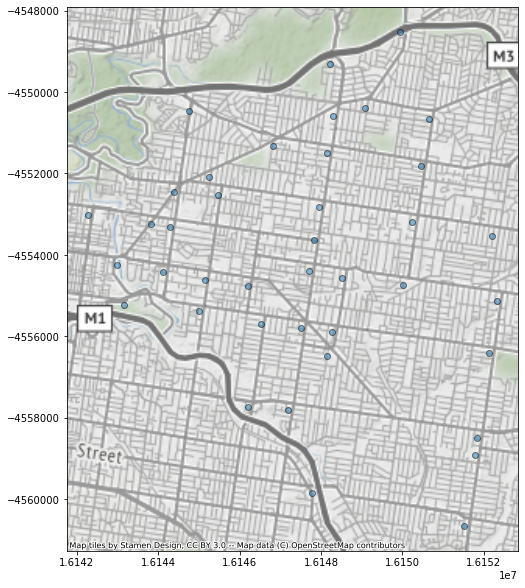

In [228]:
ax = gdf2.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

ctx.add_basemap(ax, zoom=12)

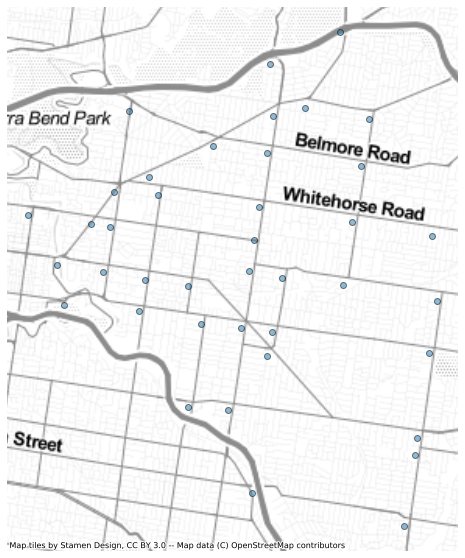

In [232]:
ax = gdf2.plot(figsize=(10, 10), alpha=0.5, edgecolor='k', label=gdf2.Point)

def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite, zoom=12)
ax.set_axis_off()

In [212]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

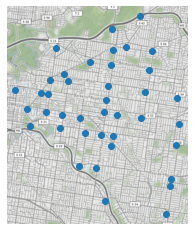

In [235]:
ax = gdf2.plot()

# choose any of the supported maps from ctx.sources
def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))
    
ctx.add_basemap(ax, url=ctx.sources.ST_TERRAIN)
ax.set_axis_off()
plt.show()

In [236]:
w, s, e, n = gdf2.total_bounds


In [237]:
img, ext = ctx.bounds2img(w, s, e, n, 13)

In [251]:
line = LineString([gdf2.Point[0].'970', gdf2.Point[0]])

SyntaxError: invalid syntax (<ipython-input-251-9d635d765156>, line 1)